# imports

In [3]:
#import libraries
import pandas as pd
from probatus.feature_elimination import ShapRFECV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import shap
import seaborn as sns
import pickle

In [4]:
#import dataframe
model1 = pd.read_csv('model1.csv')

# pre-processing

In [5]:
#drop columns we do not need
model1 = model1.drop(['subjectkey', 'Unnamed: 0', 'site_id_l'], axis=1)

In [5]:
#check missing values
missing_values = model1.isna().any()
missing_values_count = model1.isna().sum()
missing_values_count.value_counts()

0    133
dtype: int64

In [6]:
#seperate features and labels
X = model1.drop(['target'], axis=1)
y = model1['target'].values

#prepare train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
X_train.columns.tolist()

['demo_comb_income_v2',
 'sex',
 'interview_age',
 'nihtbx_fluidcomp_agecorrected',
 'cbcl_q01_p',
 'cbcl_q02_p',
 'cbcl_q03_p',
 'cbcl_q04_p',
 'cbcl_q05_p',
 'cbcl_q06_p',
 'cbcl_q07_p',
 'cbcl_q08_p',
 'cbcl_q09_p',
 'cbcl_q10_p',
 'cbcl_q11_p',
 'cbcl_q12_p',
 'cbcl_q13_p',
 'cbcl_q14_p',
 'cbcl_q15_p',
 'cbcl_q16_p',
 'cbcl_q17_p',
 'cbcl_q18_p',
 'cbcl_q19_p',
 'cbcl_q20_p',
 'cbcl_q21_p',
 'cbcl_q22_p',
 'cbcl_q23_p',
 'cbcl_q24_p',
 'cbcl_q25_p',
 'cbcl_q26_p',
 'cbcl_q27_p',
 'cbcl_q28_p',
 'cbcl_q29_p',
 'cbcl_q30_p',
 'cbcl_q31_p',
 'cbcl_q32_p',
 'cbcl_q33_p',
 'cbcl_q34_p',
 'cbcl_q35_p',
 'cbcl_q36_p',
 'cbcl_q37_p',
 'cbcl_q38_p',
 'cbcl_q39_p',
 'cbcl_q40_p',
 'cbcl_q41_p',
 'cbcl_q42_p',
 'cbcl_q43_p',
 'cbcl_q44_p',
 'cbcl_q45_p',
 'cbcl_q46_p',
 'cbcl_q47_p',
 'cbcl_q48_p',
 'cbcl_q49_p',
 'cbcl_q50_p',
 'cbcl_q51_p',
 'cbcl_q52_p',
 'cbcl_q53_p',
 'cbcl_q54_p',
 'cbcl_q55_p',
 'cbcl_q56a_p',
 'cbcl_q56b_p',
 'cbcl_q56c_p',
 'cbcl_q56d_p',
 'cbcl_q56e_p',
 'cbcl_q56f

In [7]:
#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# ShapRFECV Feature selection

In [8]:
#define random forest classifier
rf = RandomForestClassifier()

param_grid_rf = {'n_estimators': [5, 10, 15, 20, 25, 50, 100, 150],
                  'max_depth': [3, 6, 9],
                  'min_samples_split': np.arange(2, 10, 1),
                  'min_samples_leaf': np.arange(1, 10, 1)}

search_tuning = RandomizedSearchCV(rf, param_grid_rf)

# Run feature elimination
shap_elimination = ShapRFECV(
    clf=search_tuning, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X_train, y_train)

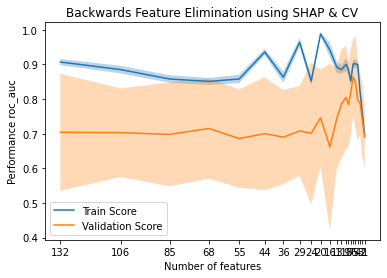

In [9]:
#Plot feature elimination
performance_plot = shap_elimination.plot()

In [10]:
print(report)

    num_features                                       features_set  \
1            132  [demo_comb_income_v2, sex, interview_age, niht...   
2            106  [cbcl_q47_p, cbcl_q90_p, cbcl_q54_p, cbcl_q03_...   
3             85  [cbcl_q47_p, cbcl_q08_p, cbcl_q27_p, cbcl_q90_...   
4             68  [cbcl_q47_p, cbcl_q08_p, cbcl_q27_p, cbcl_q03_...   
5             55  [cbcl_q47_p, cbcl_q08_p, cbcl_q27_p, cbcl_q03_...   
6             44  [cbcl_q17_p, cbcl_q47_p, cbcl_q07_p, cbcl_q08_...   
7             36  [cbcl_q17_p, cbcl_q47_p, cbcl_q27_p, cbcl_q56c...   
8             29  [cbcl_q17_p, cbcl_q27_p, cbcl_q83_p, cbcl_q03_...   
9             24  [cbcl_q17_p, cbcl_q88_p, cbcl_q71_p, cbcl_q04_...   
10            20  [cbcl_q17_p, cbcl_q71_p, cbcl_q04_p, cbcl_q32_...   
11            16  [cbcl_q71_p, cbcl_q04_p, cbcl_q112_p, cbcl_q32...   
12            13  [cbcl_q71_p, cbcl_q04_p, cbcl_q32_p, cbcl_q83_...   
13            11  [interview_age, cbcl_q71_p, cbcl_q109_p, cbcl_...   
14    

In [11]:
#select the optimal amount of features (based on the plot) and store the name of the features into a variable
selected_features = shap_elimination.get_reduced_features_set(num_features=6)

In [38]:
#create new train/test with the pre-selected features from feature selection 
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected_scaled = X_train_scaled[selected_features]
X_test_selected_scaled = X_test_scaled[selected_features]

In [13]:
#fit model with pre-selected features and do gridsearch
param_grid_rf = {'n_estimators': [15, 20, 25, 30, 35, 40],
                  'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'min_samples_leaf': [2, 3, 4, 5]}

search = GridSearchCV(rf, param_grid_rf)

search.fit(X_train_selected, y_train)
print(search.best_estimator_)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=30)


In [ ]:
roc_auc_score(y_test, y_pred_probs_rf)

[[9 3]
 [5 6]]
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        12
         1.0       0.67      0.55      0.60        11

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23



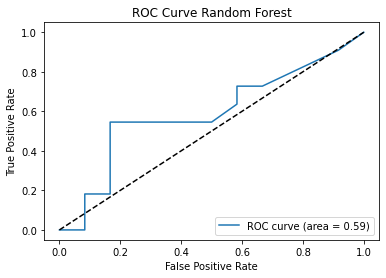

In [23]:
#update the model with parameters
rf_grid = RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=30)
rf_grid.fit(X_train_selected, y_train)
y_pred_rf = rf_grid.predict(X_test_selected)
y_pred_probs_rf = rf_grid.predict_proba(X_test_selected)[:, 1]

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#generate ROC curve values
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_probs_rf)

#plot ROC curve
plt.plot(fpr_rf, tpr_rf, label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_pred_probs_rf))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Random Forest")
plt.legend(loc="lower right")
plt.show()

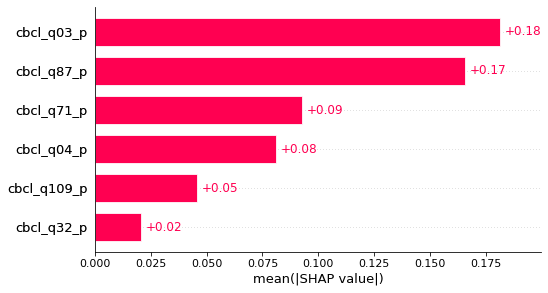

In [24]:
#shap feature importance
explainer = shap.Explainer(rf_grid.predict, X_test_selected)
shap_values = explainer(X_test_selected)
shap.plots.bar(shap_values)

In [41]:
#03 - argues a lot
#87 - sudden change in mood or feelings
#71 - self conscious of easily emberrased 
#04 - fails to finish things they start
#109 - whining
#32 - feels they have to be perfect

# logistic regression

In [25]:
lr = LogisticRegression()

param_grid_lr = {
    'penalty': ['l1','l2', 'none'],  
    'C': [10, 1.0, 0.1, 0.01],
    'solver': ['sag', 'liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500, 1000, 2000, 5000]
}

search_lr = GridSearchCV(lr, param_grid_lr)
search_lr.fit(X_train_selected, y_train)

print(search_lr.best_estimator_)

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/skl

Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports 

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

The max_iter was reached which means the coef_ did not converge
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/s

Liblinear failed to converge, increase the number of iterations.
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty

Liblinear failed to converge, increase the number of iterations.
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty

Setting penalty='none' will ignore the C and l1_ratio parameters
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):


LogisticRegression(C=10, penalty='l1', solver='liblinear')


Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/data/szomerman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty

[[8 4]
 [6 5]]
              precision    recall  f1-score   support

         0.0       0.57      0.67      0.62        12
         1.0       0.56      0.45      0.50        11

    accuracy                           0.57        23
   macro avg       0.56      0.56      0.56        23
weighted avg       0.56      0.57      0.56        23



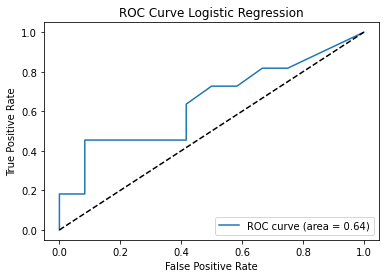

In [26]:
#fit model with pre-selected features als hyperparameters
lr_grid = LogisticRegression(C=10, penalty='l1', solver='liblinear')
lr_grid.fit(X_train_selected, y_train)
y_pred_lr = lr_grid.predict(X_test_selected)
y_pred_probs_lr = lr_grid.predict_proba(X_test_selected)[:, 1]

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

#generate ROC curve values
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_probs_lr)

#plot ROC curve
plt.plot(fpr_lr, tpr_lr, label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_pred_probs_lr))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression")
plt.legend(loc="lower right")
plt.show()

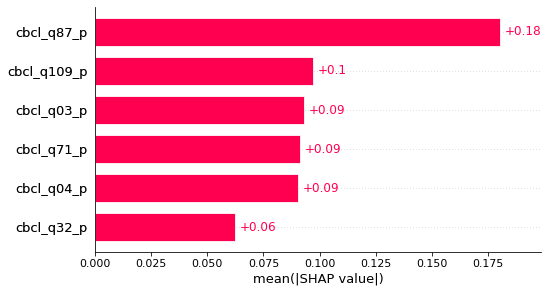

In [27]:
#shap feature importance
explainer_lr = shap.Explainer(lr_grid.predict, X_test_selected)
shap_values_lr = explainer_lr(X_test_selected)
shap.plots.bar(shap_values_lr)

# Support Vector Machine

In [28]:
svm = SVC()

param_grid_svm = {'C': [0.1, 1, 10],
                 'kernel': ['linear', 'rbf'],
                  'gamma': [0.1, 0.01, 0.001]
                 }
search_svm = GridSearchCV(svm, param_grid_svm)

search_svm.fit(X_train_selected_scaled, y_train)

print(search_svm.best_estimator_)

SVC(C=10, gamma=0.1)


[[9 3]
 [5 6]]
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        12
         1.0       0.67      0.55      0.60        11

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23



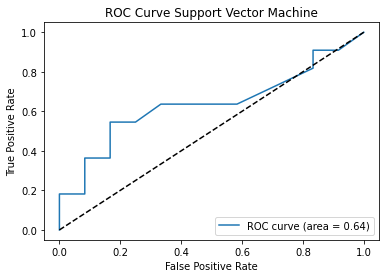

In [29]:
#fit model with pre-selected features and hyperparameters
svm_grid = SVC(C=10, gamma=0.1, probability=True)
svm_grid.fit(X_train_selected_scaled, y_train)
y_pred_svm = svm_grid.predict(X_test_selected_scaled)
y_pred_probs_svm = svm_grid.predict_proba(X_test_selected_scaled)[:, 1]

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

#generate ROC curve values
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_probs_svm)

#plot ROC curve
plt.plot(fpr_svm, tpr_svm, label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_pred_probs_svm))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Support Vector Machine")
plt.legend(loc="lower right")
plt.show()

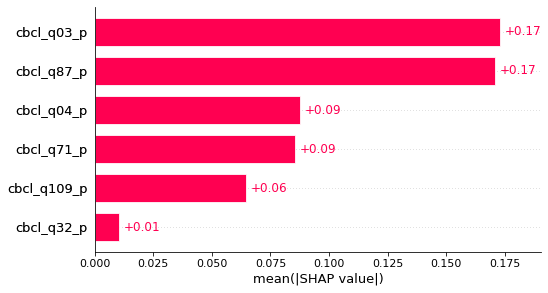

In [30]:
#shap feature importance
explainer_svm = shap.Explainer(svm_grid.predict, X_test_selected_scaled)
shap_values_svm = explainer_svm(X_test_selected_scaled)
shap.plots.bar(shap_values_svm)

In [48]:
#save needed variables to use for later visualization
data_model1 = {
    'y_train_1': y_train,
    'y_test_1': y_test,
    'X_train_selected_1': X_train_selected,
    'X_test_selected_1': X_test_selected,
    'X_train_selected_scaled_1': X_train_selected_scaled,
    'X_test_selected_scaled_1': X_test_selected_scaled,
    'y_pred_rf_1': y_pred_rf,
    'y_pred_lr_1': y_pred_lr,
    'y_pred_svm_1': y_pred_svm,
    'y_pred_probs_rf_1': y_pred_probs_rf,
    'y_pred_probs_lr_1': y_pred_probs_lr,
    'y_pred_probs_svm_1': y_pred_probs_svm,
    'fpr_rf_1': fpr_rf,
    'fpr_lr_1': fpr_lr,
    'fpr_svm_1': fpr_svm,
    'tpr_rf_1': tpr_rf,
    'tpr_lr_1': tpr_lr,
    'tpr_svm_1': tpr_svm,
    'threshold_rf_1': threshold_rf,
    'threshold_lr_1': threshold_lr,
    'threshold_svm_1': threshold_svm,
    'explainer_rf_1': explainer,
    'explainer_lr_1': explainer_lr,
    'explainer_svm_1': explainer_svm,
    'shap_values_rf_1': shap_values,
    'shap_values_lr_1': shap_values_lr,
    'shap_values_svm_1': shap_values_svm
}

with open("variables_model1.pkl", "wb") as file:
    pickle.dump((data_model1), file)
